## Recommender System For Microsoft Web Traffic

In this project we will create a recommender for user traffic on Microsoft's website. This will be using the Microsoft Web Data Dataset from UCI's Machine Learning Repository. 



In [127]:
import pandas as pd
import math
import numpy  as np
from sklearn.metrics.pairwise import pairwise_distances 

## Data

First we will parse the dataset which means going through the data mostly line by line because of the way that the data file is set up. The "Attributes" or web pages are listed in the file with As that start the line, and then the "Cases" or user lines start with a C. The lines following the Case lines contain site "Vote" lines which mark the "Attributes" or pages that the user visited. So from the C onward we have to step through each line until there are no more Vs and we can move onto the next Case. 

In [128]:

 attributes = pd.DataFrame(columns = ['A','attribute_id','1','page_title','relative_url'])
 cases = []
 
 df = pd.read_csv('anonymous-msweb.data', names = ['a','b','c','d','e','f'])
 
 attributes = df[df['a'] == 'A']
 
 case_id = 0
 for x in range(len(df)):
     
     if df.iloc[x][0] == 'C':
         case_id = df.iloc[x][1]
     elif df.iloc[x][0] == 'V':
         vote = df.iloc[x][1]
         cases.append([case_id,vote])
 cases_df = pd.DataFrame(cases, columns = ['case_id','vote'])

attributes = attributes[['b','d','e']].rename(columns={'b':'attribute_id','d':'title','e':'url'})


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Analysis

To get a feel for how the data will look we want to know what sites are visited the most and in general how many sites are visited how often. 

,attribute_id,title,url,count
64,1008,Free Downloads,/msdownload,10836
290,1034,Internet Explorer,/ie,9383
24,1004,Microsoft.com Search,/search,8463
294,1018,isapi,/isapi,5330
219,1017,Products,/products,5108
164,1009,Windows Family of OSs,/windows,4628
85,1001,Support Desktop,/support,4451
30,1026,Internet Site Construction for Developers,/sitebuilder,3220
37,1003,Knowledge Base,/kb,2968
129,1025,Web Site Builder's Gallery,/gallery,2123


Number of pages: 285
Number of pages with <= 5 visits: 58


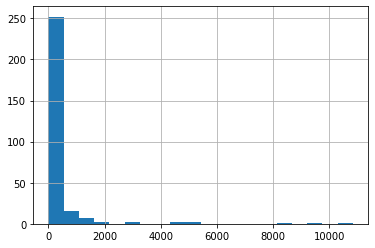

In [129]:

votes = pd.DataFrame(cases_df.groupby('vote')['vote'].count()).rename(columns={'vote':'count'}).rename_axis('attribute_id')

display(attributes.join(votes,on='attribute_id', how='inner').sort_values('count',ascending=False).head(20))

import matplotlib.pyplot as plt

display(votes['count'].hist(bins=20))

print('Number of pages:',len(votes))
print('Number of pages with <= 5 visits:',len(votes[votes['count'].isin([1,2,3,4,5])]))

The data looks like it mostly is sites that have just a few visits and then there are some sites that have a lot of visits, like the "Free Downloads" page with 10836 visits or the "Internet Explorer" page with 9383. Additionally there are 58 out of a total 285 pages with less than or equal to 5 site visits.

## Matrix Creation

Next we will create our data matrix of all cases and attributes and then create a cosine distance matrix for the votes which we can then use to recommend pages taht are similar to one another. 

In [130]:

n_cases = cases_df.case_id.unique().shape[0]
n_votes = cases_df.vote.unique().shape[0]

data_matrix = pd.DataFrame(np.zeros((n_cases,n_votes)),columns = cases_df.vote.unique(), index = cases_df.case_id.unique())
for x in range(len(cases_df)):
    data_matrix.loc[cases_df.iloc[x][0]][cases_df.iloc[x][1]]  = 1
    
print('Data Matrix with cases and attributes (first 5 rows):')
display(data_matrix.head())
    
print('Attribute/Vote similarity Matrix (first 5 rows):')
vote_similarity = pd.DataFrame(pairwise_distances(data_matrix.T, metric='cosine'), columns = data_matrix.columns, index = data_matrix.columns)
display(vote_similarity.head())

Data Matrix with cases and attributes (first 5 rows):


,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284
10001,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Attribute/Vote similarity Matrix (first 5 rows):


,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284
1000,7.771561e-16,8.510999e-01,0.951603,9.051810e-01,9.233310e-01,1.000000,0.943001,0.989867,0.922701,0.936723,...,1.0,0.980882,1.000000,1.000000,0.966887,0.976585,1.00000,1.0,1.0,0.966887
1001,8.510999e-01,3.330669e-16,0.872937,5.031137e-01,7.410995e-01,0.988436,0.954848,0.986749,0.828506,0.814702,...,1.0,0.991346,0.985011,1.000000,1.000000,0.989401,1.00000,1.0,1.0,1.000000
1002,9.516026e-01,8.729372e-01,0.000000,9.148213e-01,9.030859e-01,1.000000,0.965407,0.995031,0.905577,0.896338,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.000000
1003,9.051810e-01,5.031137e-01,0.914821,8.881784e-16,7.444034e-01,0.983006,0.982622,0.990638,0.820140,0.824078,...,1.0,0.978805,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.0,1.000000
1004,9.233310e-01,7.410995e-01,0.903086,7.444034e-01,1.110223e-15,0.991613,0.960707,0.974498,0.793552,0.794993,...,1.0,0.987448,0.989130,0.992314,1.000000,0.984627,0.98913,1.0,1.0,1.000000


## Page Recommender

Using the similarity matrix created above we can now take in attribute ID's and recommend the closest pages to that page. Here we try it for the "SQL Server", "Visual Basic", and "Free Downloads" pages:

In [131]:

def recommender_attribute_id(similarity_mat,attribute_id,top=20):
    return attributes.join(vote_similarity.loc[attribute_id].nsmallest(top),on='attribute_id',how='inner').sort_values(attribute_id)

print('Similarity of pages to page "SQL Server":')
display(attributes[attributes['attribute_id'] == 1118])
display(recommender_attribute_id(vote_similarity,1118,top=20))

print('Similarity of pages to page "Visual Basic":')
display(attributes[attributes['attribute_id'] == 1010])
display(recommender_attribute_id(vote_similarity,1010,top=20))

print('Similarity of pages to page "Free Downloads":')
display(attributes[attributes['attribute_id'] == 1008])
display(recommender_attribute_id(vote_similarity,1008,top=20))

print('Similarity of pages to page "Games":')
display(attributes[attributes['attribute_id'] == 1032])
display(recommender_attribute_id(vote_similarity,1032,top=20))

print('Similarity of pages to page "MS PowerPoint":')
display(attributes[attributes['attribute_id'] == 1019])
display(recommender_attribute_id(vote_similarity,1019,top=20))

Similarity of pages to page "SQL Server":


,attribute_id,title,url
39,1118,SQL Server,/sql


,attribute_id,title,url,1118
39,1118,SQL Server,/sql,0.000000
203,1134,BackOffice,/backoffice,0.814288
113,1197,SQL Support,/sqlsupport,0.838251
160,1206,Volume Purchasing Options,/select,0.886727
219,1017,Products,/products,0.908249
139,1128,MS Solutions Framework,/msf,0.923751
294,1018,isapi,/isapi,0.932113
297,1030,Windows NT Server,/ntserver,0.936062
106,1024,Internet Information Server,/iis,0.943211
192,1124,Industry Marketing Information (Vertical),/industry,0.943707


Similarity of pages to page "Visual Basic":


,attribute_id,title,url
220,1010,Visual Basic,/vbasic


,attribute_id,title,url,1010
220,1010,Visual Basic,/vbasic,1.554312e-15
151,1093,VBA Development,/vba,7.277025e-01
272,1020,Developer Network,/msdn,7.853163e-01
95,1068,VBScript Development,/vbscript,7.928760e-01
211,1042,Visual Studio,/vstudio,8.532316e-01
149,1013,Visual Basic Support,/vbasicsupport,8.546120e-01
219,1017,Products,/products,8.670707e-01
43,1021,Visual C,/visualc,8.757317e-01
121,1190,Repository,/repository,8.798083e-01
101,1041,Developer Workshop,/workshop,8.924973e-01


Similarity of pages to page "Free Downloads":


,attribute_id,title,url
64,1008,Free Downloads,/msdownload


,attribute_id,title,url,1008
64,1008,Free Downloads,/msdownload,1.332268e-15
290,1034,Internet Explorer,/ie,4.783486e-01
164,1009,Windows Family of OSs,/windows,6.400529e-01
294,1018,isapi,/isapi,6.855151e-01
219,1017,Products,/products,7.307715e-01
24,1004,Microsoft.com Search,/search,7.935523e-01
176,1035,Windows95 Support,/windowssupport,7.979738e-01
65,1052,MS Word News,/word,8.079840e-01
37,1003,Knowledge Base,/kb,8.201404e-01
85,1001,Support Desktop,/support,8.285062e-01


Similarity of pages to page "Games":


,attribute_id,title,url
267,1032,Games,/games


,attribute_id,title,url,1032
267,1032,Games,/games,2.553513e-15
180,1056,sports,/sports,6.786655e-01
250,1090,Games Support,/gamessupport,8.601744e-01
219,1017,Products,/products,8.704811e-01
64,1008,Free Downloads,/msdownload,8.706545e-01
164,1009,Windows Family of OSs,/windows,8.952417e-01
24,1004,Microsoft.com Search,/search,9.130985e-01
290,1034,Internet Explorer,/ie,9.139394e-01
294,1018,isapi,/isapi,9.225555e-01
78,1058,SP Referral (ART),/referral,9.330462e-01


Similarity of pages to page "MS PowerPoint":


,attribute_id,title,url
99,1019,MS PowerPoint,/mspowerpoint


,attribute_id,title,url,1019
99,1019,MS PowerPoint,/mspowerpoint,0.000000
25,1057,MS PowerPoint News,/powerpoint,0.497017
184,1151,MS PowerPoint Support,/mspowerpointsupport,0.855014
239,1089,Office Reference,/officereference,0.901524
219,1017,Products,/products,0.921645
252,1040,MS Office Info,/office,0.931517
227,1178,msdownload.,/msdownload.,0.932884
225,1213,Corporate Customers,/corporate_solutions,0.945200
217,1015,Excel,/msexcel,0.946606
145,1016,MS Excel,/excel,0.949576


The results from the recommender are pretty good for SQL Server, giving us BackOffice (which was a software suite that included SQL Server in 1998), SQL Support,  Volume Ourchasing Options (probably for licenses etc) and Products (which could lead to SQL Server as a product. This seems pretty accurate. 

For Visual Basic we are also pretty accurate with the recommendations, giving us VBA Development, Developer Network, VBScript Development, and other development pages as recommendations.

For Free Downloads we at least get Internet Explorer as the top recommended option but everything else seems pretty much just like the top pages that we looked at earlier.

For Games we got pretty good with the top 2 recommendations being "sports" and "Games Support" but otherwise again this is pretty close to the top sites on Microsoft.

For MS PowerPoint we again are accurate with nearly all the pages recommended being regarding MS Powerpoint of MS Office products of some type includeing Excel and Word.

# Conclusion

Overall, we produced a pretty good page recommender based on Microsoft's web traffic from 1998. We were able to successfully create matrices that showed us how similar each page was to one another based on how often groups of pages were visited by different users. 